# Data Analysis Notebook

This data analysis notebook is a collection of common methods shown using static analysis and visualizations.  
Datasets can be swapped out and all contained in the datasets folder should ideally work with this notebook.  

### Package Imports

These are package imports which the notebook will use throughout, be sure this is executed first for necessary library functionality.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Load Data

We select a dataset from the datasets folder and view what the dataframe looks like in the top 5 rows.

In [17]:
# specify the folder where the datasets are stored
datasets_folder = 'datasets/'

# Specify the file path to the CSV file containing the data
file_path = datasets_folder + 'fisher_iris.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

### Data Characteristics

In [18]:
# Display DataFrame information
print('Number of cases: ', df.shape[0])

print('Number of classes: ', len(df['class'].unique()))
print('Classes: ', df['class'].unique())

print(df['class'].value_counts(), sep='\n')

print('Number of attributes: ', df.shape[1])
print('Attributes: ', df.columns.drop('class').values)

# Display the top 5 rows of the DataFrame
df.head()

Number of cases:  150
Number of classes:  3
Classes:  ['Setosa' 'Versicolor' 'Virginica']
class
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64
Number of attributes:  5
Attributes:  ['sepal.length' 'sepal.width' 'petal.length' 'petal.width']


,sepal.length,sepal.width,petal.length,petal.width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Data Normalization

First we must normalize the data frame for all numerical values we utilize min-max normalzation.  
This removes redundant data, minimizes error, and simplifies the analysis process from matching scales.  
To perform min-max normalization on a numerical variable, you can use the following formula:

Normalized Value = $\frac{Value - Min}{Max - Min}$


In [19]:
# Get the column names of the DataFrame
columns = df.columns

# remove the 'class' column
columns = columns.drop('class')

# Create a new DataFrame with the data
df_normalized = df.copy()

# min max normalization of new DataFrame
df_normalized[columns] = (df[columns] - df[columns].min()) / (df[columns].max() - df[columns].min())

### Confiuration

We setup consistent figure size and alpha transparency value, and a colormap based on the classes of the dataset.

In [20]:
fsize = (10, 6)  # figure size
a = 0.4          # transparency

# get the unique class names
class_names = df['class'].unique()

# Set the color map based on the number of classes in the 'class' column
class_names = [name.lower() for name in class_names]

# Binary classification
if len(class_names) == 2 and ('positive' in class_names or 'negative' in class_names) or \
    ('yes' in class_names or 'no' in class_names) or \
    ('true' in class_names or 'false' in class_names) or \
    ('1' in class_names or '0' in class_names) or \
    ('malignant' in class_names or 'benign' in class_names):
        cmap = sns.color_palette(['green', 'red'])

# Three-class classification
elif len(class_names) == 3:
    cmap = sns.color_palette(['red', 'green', 'blue'])

# Multi-class classification
else:
    cmap = sns.color_palette('viridis', len(class_names))


### Pairplot

A pairplot or scatterplot matrix shows us the distributions and relations between each attribute of the dataset.

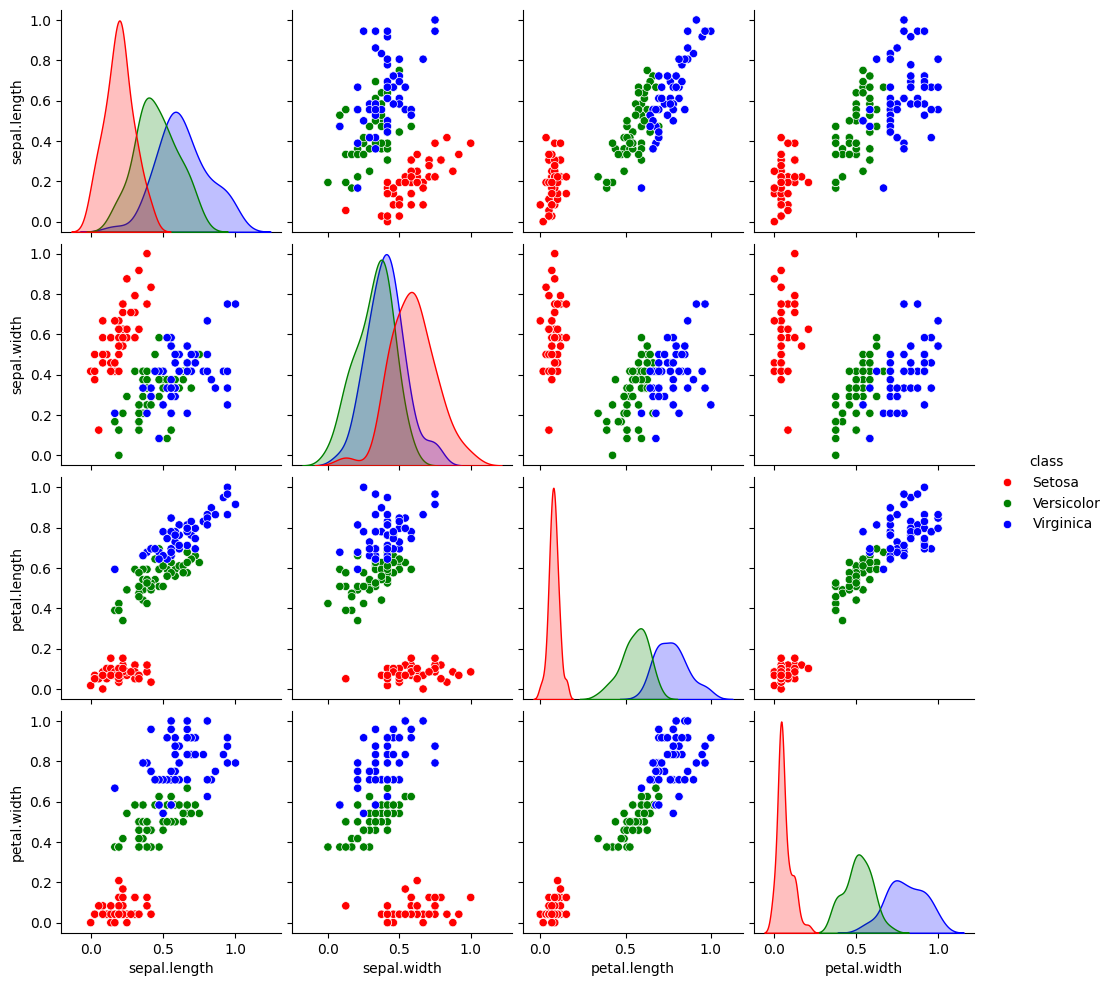

In [21]:
# Create a pairplot of the DataFrame
sns.pairplot(df_normalized, hue='class', vars=columns, palette=cmap)

## Standard Lossless Visualization Techniques

Lossless visualization techniques allow for full multi-dimensional data distribution analysis. The following visualizations have this quality. These are the most standard of such visualizations.

### Parallel coordinates

We plot the data in a lossless General Line Coordinate method called Parallel coordinates showing all attributes and values.

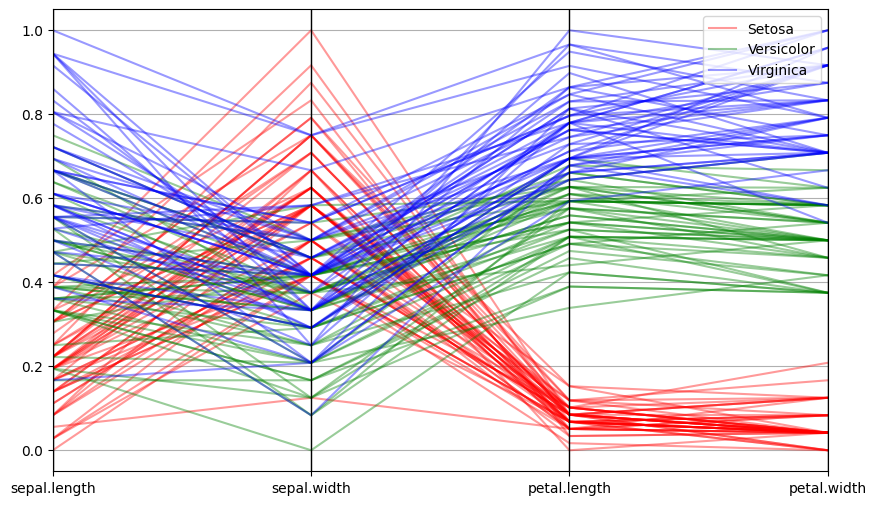

In [22]:
# set size
plt.figure(figsize=fsize)

# Plot the DataFrame in normalized parallel coordinates
pd.plotting.parallel_coordinates(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()


### Andrew's Curves

A smoothed variant of Parallel coordinates using a finite Fourier series to produce smooth curves.

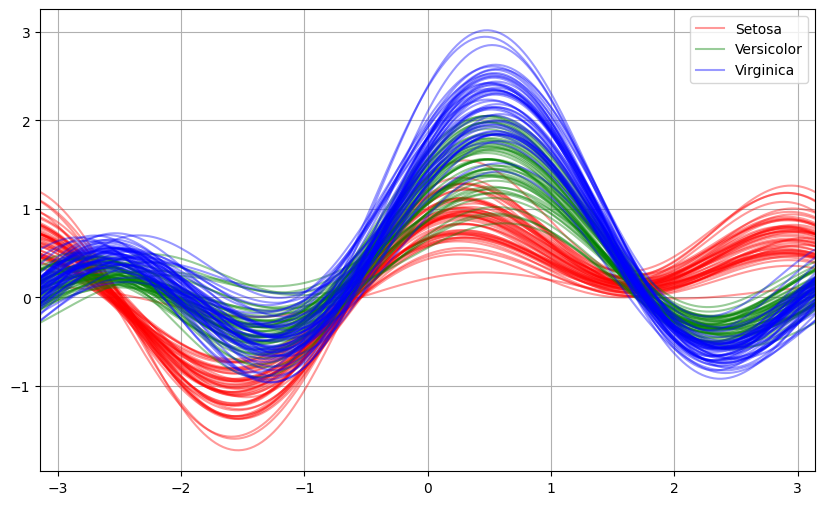

In [23]:
# set size
plt.figure(figsize=fsize)

# Plot the normalized DataFrame using Andrews Curves
pd.plotting.andrews_curves(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()

### RadViz

RadViz or Radial Visualization additionally shows contribution of all elements but suffers from dimensional occlussion for high attribute counts and constrained plot space. 

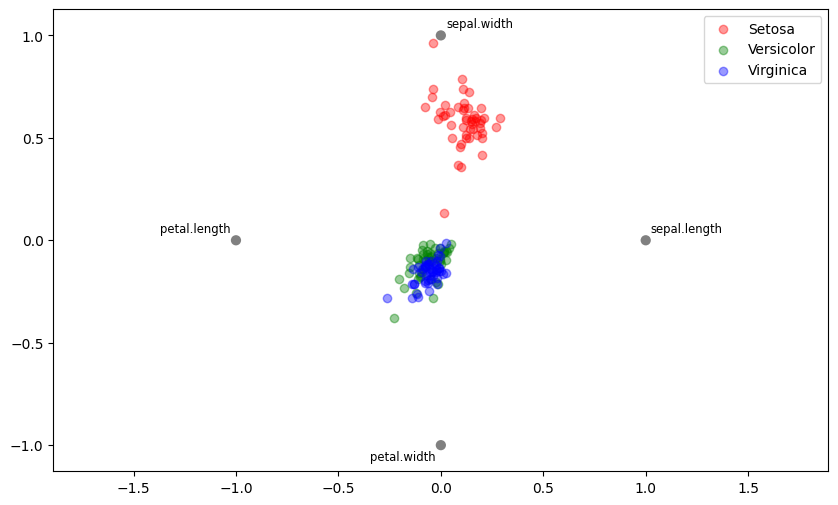

In [24]:
# set size
plt.figure(figsize=fsize)

# Create a Radviz plot of the DataFrame
pd.plotting.radviz(df_normalized, 'class', color=cmap, alpha=a)

# Display the plot
plt.show()

## Lossy Visualization Techniques

### T-SNE

T-Distributed Stochastic Neighbor Embedding

<Axes: xlabel='x', ylabel='y'>

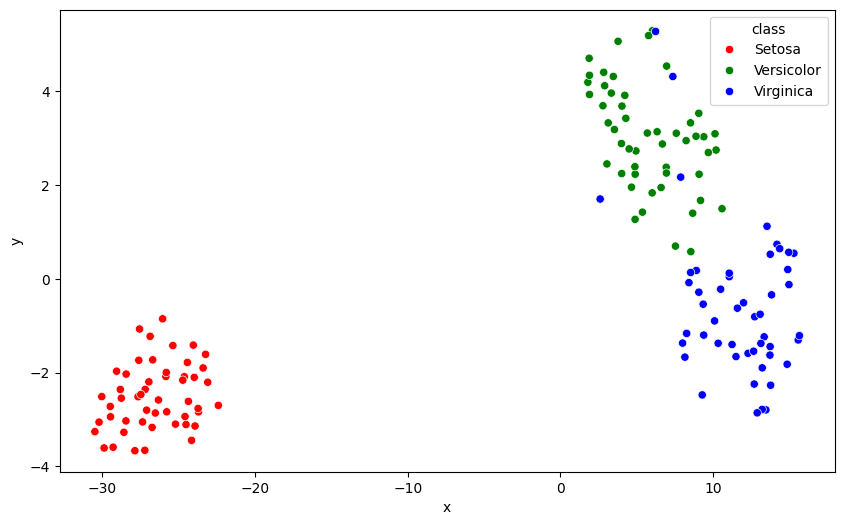

In [25]:
# visualize with t-SNE

# Create a TSNE object
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the data
X_2d = tsne.fit_transform(df_normalized[columns])

# Create a DataFrame with the 2D data
df_2d = pd.DataFrame(X_2d, columns=['x', 'y'])

# Add the 'class' column to the DataFrame
df_2d['class'] = df['class']

# set size
plt.figure(figsize=fsize)

# Create a scatter plot of the 2D data
sns.scatterplot(x='x', y='y', hue='class', data=df_2d, palette=cmap)


### PCA

Principal Component Analysis

<Axes: xlabel='x', ylabel='y'>

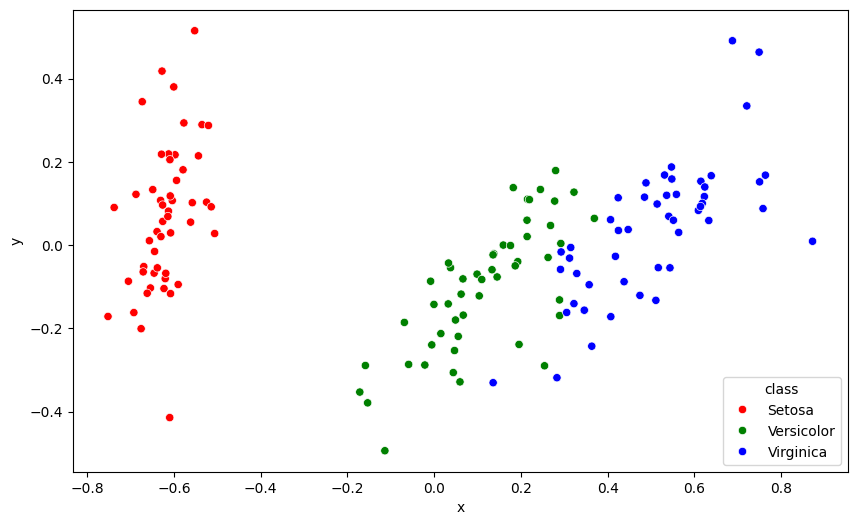

In [26]:
# visualize the data with PCA

# Create a PCA object
pca = PCA(n_components=2)

# Fit and transform the data
X_2d = pca.fit_transform(df_normalized[columns])

# Create a DataFrame with the 2D data
df_2d = pd.DataFrame(X_2d, columns=['x', 'y'])

# Add the 'class' column to the DataFrame
df_2d['class'] = df['class']

# set size
plt.figure(figsize=fsize)

# Create a scatter plot of the 2D data
sns.scatterplot(x='x', y='y', hue='class', data=df_2d, palette=cmap)

### LDA

Linear Discriminant Analysis

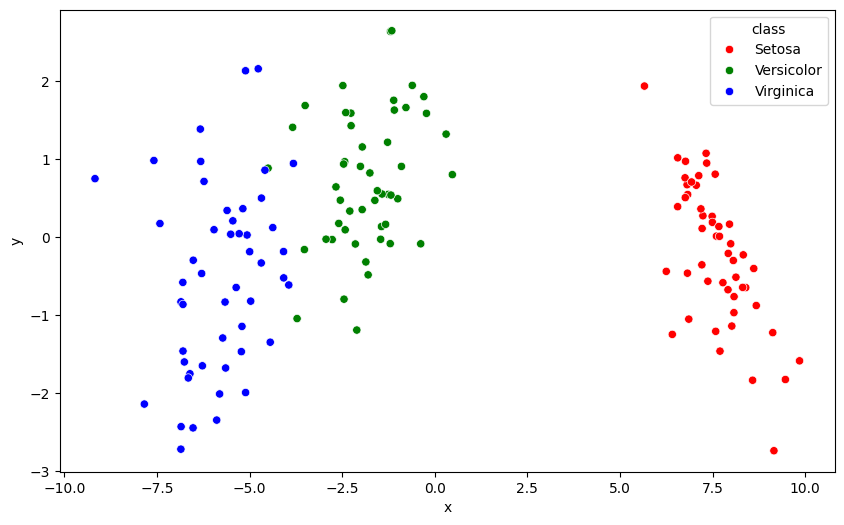

In [27]:
# plot LDA

# Create a LinearDiscriminantAnalysis object
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the data
X_2d = lda.fit_transform(df_normalized[columns], df['class'])

# Create a DataFrame with the 2D data
df_2d = pd.DataFrame(X_2d, columns=['x', 'y'])

# Add the 'class' column to the DataFrame
df_2d['class'] = df['class']

# set size
plt.figure(figsize=fsize)

# Create a scatter plot of the 2D data
sns.scatterplot(x='x', y='y', hue='class', data=df_2d, palette=cmap)

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

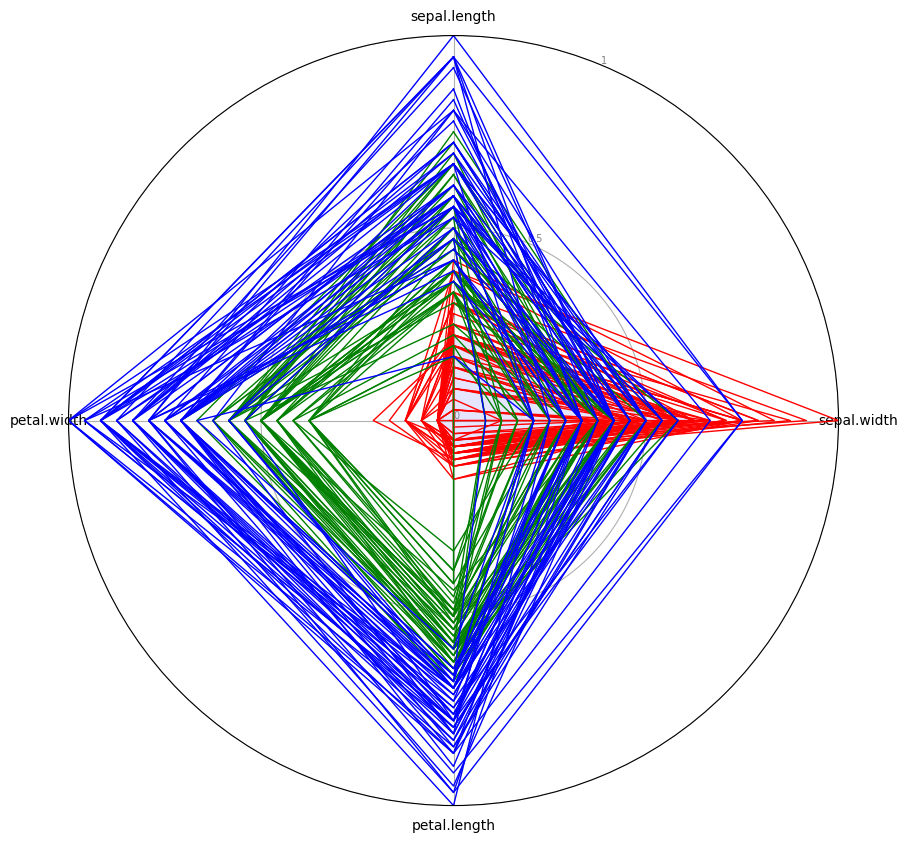

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=fsize)

# Convert DataFrame to numeric values
df_numeric = df_normalized.drop(columns=['class']).apply(pd.to_numeric, errors='coerce')

# Define radar chart parameters
labels = df_numeric.columns
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Add the first axis at the end

# The plot is circular, so we need to "complete the loop" and append the start at the end.
stats = df_numeric.values.tolist()

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels (excluding 'class')
plt.xticks(angles[:-1], labels)

# Draw y-labels
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
plt.ylim(0, 1)

# Get unique class labels
class_labels = df['class'].unique()

# Define a color map based on class labels
class_colors = {label: color for label, color in zip(class_labels, cmap)}

# Plot data
for i, (stat, label) in enumerate(zip(stats, df['class'])):
    stat += [stat[0]]  # Append the first element to complete the loop
    color = class_colors[label]  # Get color based on class label
    ax.plot(angles, stat, linewidth=1, linestyle='solid', color=color)

# Fill area
ax.fill(angles, stats[0], color='blue', alpha=0.1)

plt.show()

## Classification Methods

### Decision Tree

Decision tree visualization, statistics, and feature importance.

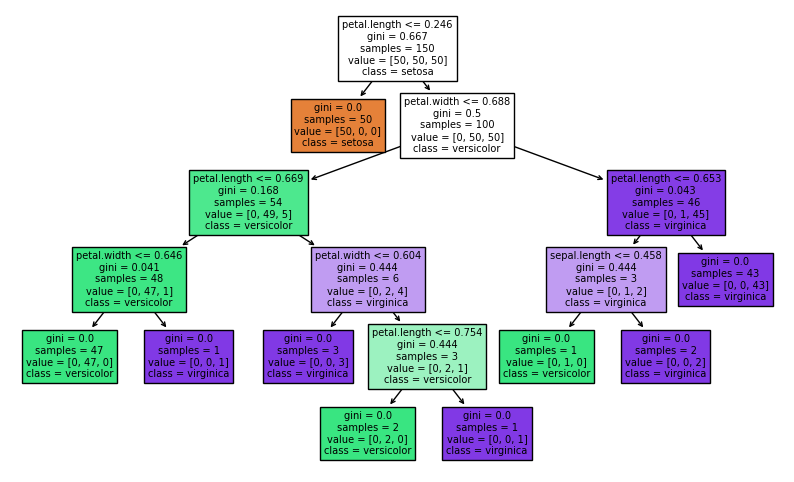

Accuracy: 1.0
Feature importances: [0.01333333 0.         0.56405596 0.42261071]
Number of nodes: 17
Depth of the tree: 5
Number of leaves: 9


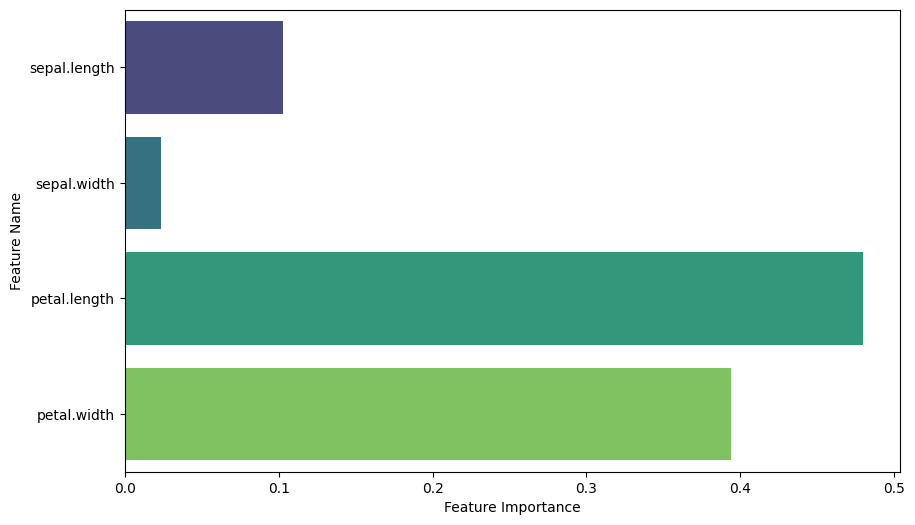

In [37]:
X = df_normalized.drop('class', axis=1)
y = df_normalized['class']

# Create the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=fsize)
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

print("Accuracy: " + str(clf.score(X, y)))
print("Feature importances: " + str(clf.feature_importances_))
print("Number of nodes: " + str(clf.tree_.node_count))
print("Depth of the tree: " + str(clf.tree_.max_depth))
print("Number of leaves: " + str(clf.get_n_leaves()))

# Visualize the feature importances

importances = rf_model.feature_importances_

plt.figure(figsize=fsize)

sns.barplot(x=importances, y=columns, palette="viridis", hue=columns)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')

plt.show()


<Figure size 1000x600 with 0 Axes>

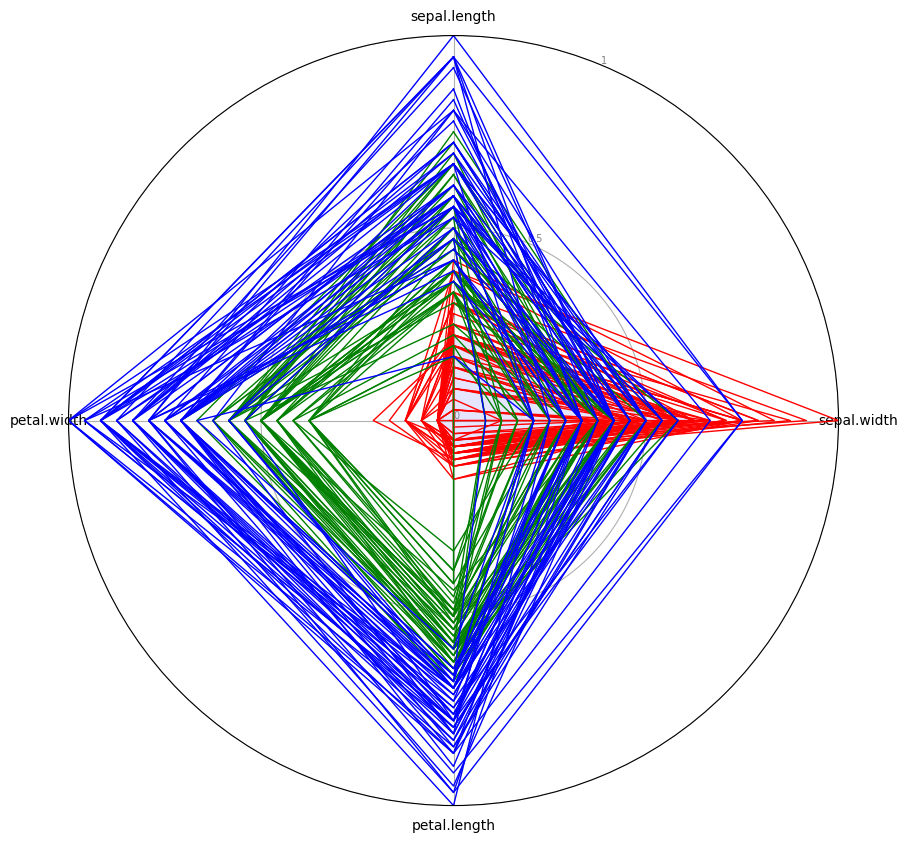

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=fsize)

# Convert DataFrame to numeric values
df_numeric = df_normalized.drop(columns=['class']).apply(pd.to_numeric, errors='coerce')

# Define radar chart parameters
labels = df_numeric.columns
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Add the first axis at the end

# The plot is circular, so we need to "complete the loop" and append the start at the end.
stats = df_numeric.values.tolist()

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels (excluding 'class')
plt.xticks(angles[:-1], labels)

# Draw y-labels
plt.yticks([0, 0.5, 1], ["0", "0.5", "1"], color="grey", size=7)
plt.ylim(0, 1)

# Get unique class labels
class_labels = df['class'].unique()

# Define a color map based on class labels
class_colors = {label: color for label, color in zip(class_labels, cmap)}

# Plot data
for i, (stat, label) in enumerate(zip(stats, df['class'])):
    stat += [stat[0]]  # Append the first element to complete the loop
    color = class_colors[label]  # Get color based on class label
    ax.plot(angles, stat, linewidth=1, linestyle='solid', color=color)

# Fill area
ax.fill(angles, stats[0], color='blue', alpha=0.1)

plt.show()

### Support Vector Machine (SVM)

Testing various test split percentages, seed values, and kernel functions.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

X = df_normalized[columns].values
y = df['class'].values

# Assuming df_normalized contains your features and labels
# Splitting the data into training and testing sets with various test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # List of test sizes to try

test_seeds = list(range(0, 101))  # List of random seeds to use

# Define a list of kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize lists to store accuracies and number of support vectors for each test size
results = []

# Loop through each test size
for test_size in test_sizes:
    for seed in test_seeds:
        # Splitting the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
        
        # Initialize lists to store results for current test size
        test_results = {'Test Size': test_size, 'Seed': seed}
        
        # Loop through each kernel type
        for kernel in kernels:
            # Train SVM with current kernel type
            svm_model = SVC(kernel=kernel)
            svm_model.fit(X_train, y_train)
            
            # Predictions on test set
            y_pred = svm_model.predict(X_test)
            
            # Calculate accuracy
            acc = accuracy_score(y_test, y_pred)
            test_results[f'{kernel}_Accuracy'] = acc
            
            # Number of support vectors
            n_support_vectors = len(svm_model.support_vectors_)
            test_results[f'{kernel}_Support_Vectors'] = n_support_vectors
        
        # Append results for current test size
        results.append(test_results)

results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)  # Display all rows
print(results_df)

# Find maximum and minimum values for accuracy and vector counts
max_accuracy = results_df[['linear_Accuracy', 'poly_Accuracy', 'rbf_Accuracy', 'sigmoid_Accuracy']].max().max()
max_accuracy_condition = results_df[['linear_Accuracy', 'poly_Accuracy', 'rbf_Accuracy', 'sigmoid_Accuracy']].max().idxmax()
max_accuracy_seed = results_df.loc[results_df[max_accuracy_condition] == max_accuracy, 'Seed'].values[0]
max_accuracy_test_size = results_df.loc[results_df[max_accuracy_condition] == max_accuracy, 'Test Size'].values[0]

min_accuracy = results_df[['linear_Accuracy', 'poly_Accuracy', 'rbf_Accuracy', 'sigmoid_Accuracy']].min().min()
min_accuracy_condition = results_df[['linear_Accuracy', 'poly_Accuracy', 'rbf_Accuracy', 'sigmoid_Accuracy']].min().idxmin()
min_accuracy_seed = results_df.loc[results_df[min_accuracy_condition] == min_accuracy, 'Seed'].values[0]
min_accuracy_test_size = results_df.loc[results_df[min_accuracy_condition] == min_accuracy, 'Test Size'].values[0]

max_vectors = results_df[['linear_Support_Vectors', 'poly_Support_Vectors', 'rbf_Support_Vectors', 'sigmoid_Support_Vectors']].max().max()
max_vectors_condition = results_df[['linear_Support_Vectors', 'poly_Support_Vectors', 'rbf_Support_Vectors', 'sigmoid_Support_Vectors']].max().idxmax()
max_vectors_seed = results_df.loc[results_df[max_vectors_condition] == max_vectors, 'Seed'].values[0]
max_vectors_test_size = results_df.loc[results_df[max_vectors_condition] == max_vectors, 'Test Size'].values[0]

min_vectors = results_df[['linear_Support_Vectors', 'poly_Support_Vectors', 'rbf_Support_Vectors', 'sigmoid_Support_Vectors']].min().min()
min_vectors_condition = results_df[['linear_Support_Vectors', 'poly_Support_Vectors', 'rbf_Support_Vectors', 'sigmoid_Support_Vectors']].min().idxmin()
min_vectors_seed = results_df.loc[results_df[min_vectors_condition] == min_vectors, 'Seed'].values[0]
min_vectors_test_size = results_df.loc[results_df[min_vectors_condition] == min_vectors, 'Test Size'].values[0]

# Calculate means for accuracy and vector counts
mean_accuracy = results_df[['linear_Accuracy', 'poly_Accuracy', 'rbf_Accuracy', 'sigmoid_Accuracy']].mean()
mean_vectors = results_df[['linear_Support_Vectors', 'poly_Support_Vectors', 'rbf_Support_Vectors', 'sigmoid_Support_Vectors']].mean()

# Tabulate the results
summary_df = pd.DataFrame({
    'Metric': ['Maximum Accuracy', 'Minimum Accuracy', 'Maximum Support Vectors', 'Minimum Support Vectors', 'Mean Accuracy', 'Mean Support Vectors'],
    'Value': [max_accuracy, min_accuracy, max_vectors, min_vectors, mean_accuracy.mean(), mean_vectors.mean()],
    'Condition': [f'{max_accuracy_condition}, Seed: {max_accuracy_seed}, Test Size: {max_accuracy_test_size}', 
                  f'{min_accuracy_condition}, Seed: {min_accuracy_seed}, Test Size: {min_accuracy_test_size}', 
                  f'{max_vectors_condition}, Seed: {max_vectors_seed}, Test Size: {max_vectors_test_size}', 
                  f'{min_vectors_condition}, Seed: {min_vectors_seed}, Test Size: {min_vectors_test_size}', '', '']
})

print(summary_df)


     Test Size  Seed  linear_Accuracy  linear_Support_Vectors  poly_Accuracy  \
0          0.1     0         0.933333                      64       1.000000   
1          0.1     1         1.000000                      66       0.933333   
2          0.1     2         1.000000                      64       1.000000   
3          0.1     3         1.000000                      67       1.000000   
4          0.1     4         0.933333                      64       0.866667   
5          0.1     5         0.800000                      65       0.866667   
6          0.1     6         0.933333                      66       1.000000   
7          0.1     7         0.866667                      65       0.866667   
8          0.1     8         0.866667                      63       0.866667   
9          0.1     9         1.000000                      66       1.000000   
10         0.1    10         1.000000                      65       0.933333   
11         0.1    11         0.866667   